In [1]:
import pandas as pd
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Rename the column name from "sales" to "department"

In [2]:
hr=hr.rename(columns = {'sales':'department'})

In [3]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Our data is pretty clean, no missing values.

In [4]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

The data contains 14,999 employees and 10 features

In [5]:
hr.shape

(14999, 10)

describe() method will give us some basic summary statistics about various fields of the dataset. Let's run some summary statistics to get an insight into what we are dealing with:

In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

In [7]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine “technical”, “support” and “IT” together and call them “technical”.

In [8]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

After the change, this is how the department categories look:

In [9]:
print(hr['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


## Data Exploring

First of all, let us find out the number of employees who left the company and those who didn’t:

In [10]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

There are 3571 employees left and 11428 employees stayed in our data.

Let us get a sense of the numbers across these two classes:

In [11]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Several observations:

- The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.

- The average monthly work hours of employees who left the company is more than that of the employees who stayed.
- The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
- The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.


We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [12]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [13]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Data Visualization

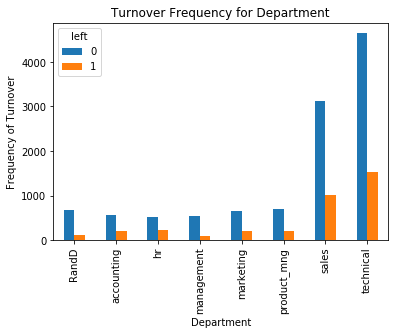

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

In [15]:
pd.crosstab(hr.department, hr.left)

left,0,1
department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


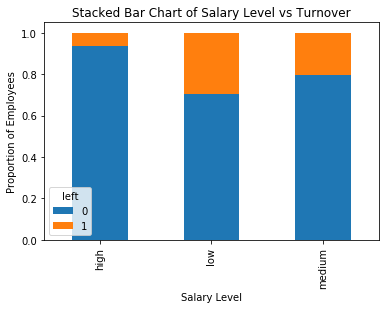

In [16]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

Histogram of numeric variables

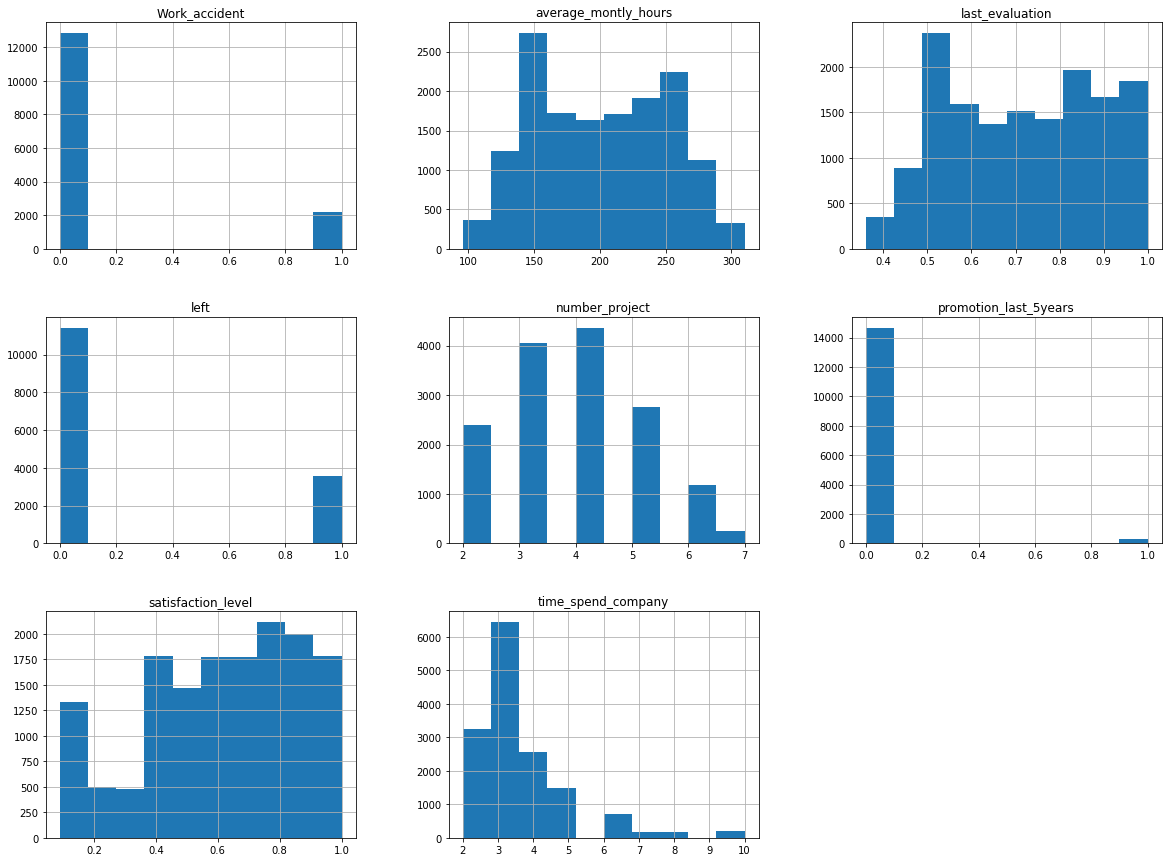

In [17]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

### Create dummy variables for categorical variables

There are two categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [18]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

The actual categorical variable needs to be removed once the dummy variables have been created.

In [20]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

Column names after creating dummy variables for categorical variables:

In [21]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

The outcome variable is “left”, and all the other variables are predictors.

In [22]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [23]:
X

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

Recursive Feature Elimination (RFE) to help us decide which variables are significant that can predict employee turnover with great accuracy. Choosing to select a round number, 10.

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will b

In [25]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

### Logistic regression model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

training_score = logreg.score(X_train, y_train)
testing_score = logreg.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7695971044861415
Testing Score: 0.7611111111111111


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9786666666666667

### Support Vector Machine

In [41]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

print('Test Acc: %.3f' % svc.score(X_test, y_test))

Test Acc: 0.765


### Precision and recall

Random Forest

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3428
           1       0.96      0.95      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



LogReg

In [35]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.50      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500



SVM

In [42]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3428
           1       0.52      0.25      0.33      1072

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.77      0.73      4500



Out of all the turnover cases, random forest correctly retrieved 991 out of 1038. This translates to a turnover "recall" of about 95%, far better than logistic regression (25%) or support vector machines (25%).

When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called "precision". Random forest again out preforms the other two at about 96% precision with logistic regression at about 50%, and support vector machine at about 52%.

In [45]:
sorted(zip(rf.feature_importances_, cols), reverse=True)

[(0.5057703367137517, 'satisfaction_level'),
 (0.26653622534842425, 'time_spend_company'),
 (0.18227713136549217, 'last_evaluation'),
 (0.014765078858857375, 'Work_accident'),
 (0.010908978073235428, 'salary_low'),
 (0.008417434862578923, 'salary_high'),
 (0.0035752353246134645, 'department_RandD'),
 (0.0029907950432039782, 'department_hr'),
 (0.002527338070215891, 'department_management'),
 (0.0022314463396268347, 'promotion_last_5years')]